In [154]:
#importing libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  
nltk.download('punkt')
stop = set(stopwords.words('english')) #setting the stopwords
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import os
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [155]:
train= pd.read_csv('dataset_elec_4000.csv') #Loading the dataset
train.head(3) #showing the first three data of the dataset 


,review,rating
0,This case is just beautiful. I can't think of ...,1.0
1,My husband purchased these because he likes mo...,1.0
2,Very disappointed. This item worked a time or...,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


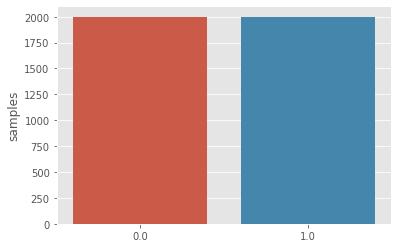

In [156]:
x=train.rating.value_counts() #finds the number of rating of each values i.e., 0 and 1 
sns.barplot(x.index,x) #creating a barplot using the data we got above
plt.gca().set_ylabel('samples') #setting the label in the graph
plt.show() #showing the graph

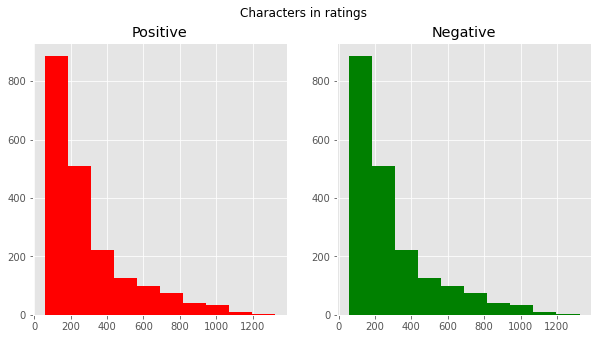

In [157]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5)) #Creating multiple layout in subplots
review_len=train[train['rating']==1.0]['review'].str.len() #finding the length of the characters in positive ratings 
ax1.hist(review_len,color='red') #visualizing it in a histogram with red in color 
ax1.set_title('Positive') #setting the title as positive
tweet_len=train[train['rating']==0.0]['review'].str.len() #finding the length of the characters in negative ratings 
ax2.hist(review_len,color='green') #visualizing it in a histogram with green in color 
ax2.set_title('Negative') #setting the title as negative
fig.suptitle('Characters in ratings') #Choosing the main title as character in ratings
plt.show() #showing the histogram

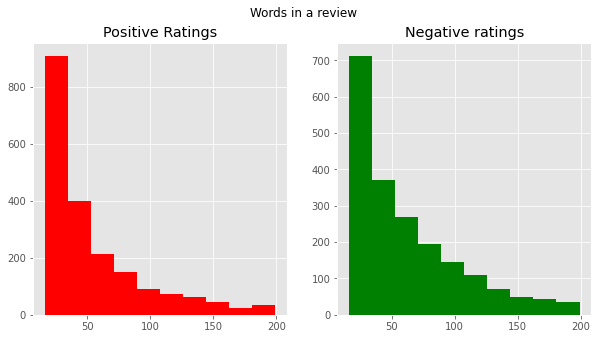

In [158]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))#Creating multiple layout in subplots
review1_len=train[train['rating']==1]['review'].str.split().map(lambda x: len(x)) #finding the length of the words in positive ratings 
ax1.hist(review1_len,color='red')#visualizing it in a histogram with red in color
ax1.set_title('Positive Ratings')#setting the title as positive
review1_len=train[train['rating']==0]['review'].str.split().map(lambda x: len(x))#finding the length of the words in negative ratings 
ax2.hist(review1_len,color='green')#visualizing it in a histogram with green in color 
ax2.set_title('Negative ratings')#setting the title as negative
fig.suptitle('Words in a review')#Choosing the main title as character in ratings
plt.show()#showing the histogram

Text(0.5, 0.98, 'Average word length in each review')

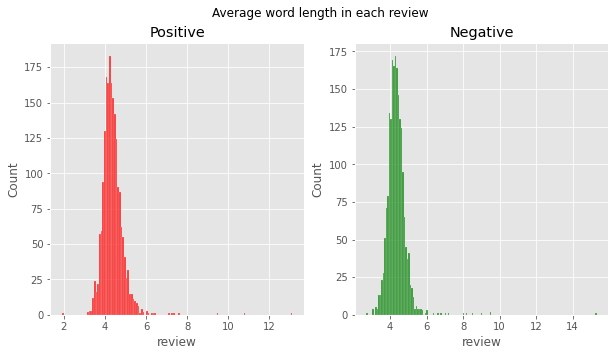

In [159]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))#Creating multiple layout in subplots
word=train[train['rating']==1]['review'].str.split().apply(lambda x : [len(i) for i in x])#creating the histogram for the positive side
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')#visualizing it in red color
ax1.set_title('Positive')#setting the title as positive
word=train[train['rating']==0]['review'].str.split().apply(lambda x : [len(i) for i in x])#creating the histogram for the negative side
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')#visualizing it in a histogram with green in color
ax2.set_title('Negative')#setting the title as negative
fig.suptitle('Average word length in each review')#main titile

In [160]:
#create a corpus of the rating column.
def create_corpus(rating):
    corpus=[] #empty list corpus
    
    for x in train[train['rating']== rating]['review'].str.split(): #splitting the string
        for i in x:
            corpus.append(i) #appending the value to corpus list
    return corpus 

In [161]:
corpus=create_corpus(0) #setting value of corpus as the first value of create_corpus

dic=defaultdict(int) 
for word in corpus: #looping through every words in corpus for positive
    if word in stop: #from stopwords
        dic[word]+=1 #adding the value
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]  #using lamda function to sort the dictionary items ie., taking x in and returning x[1]

<BarContainer object of 10 artists>

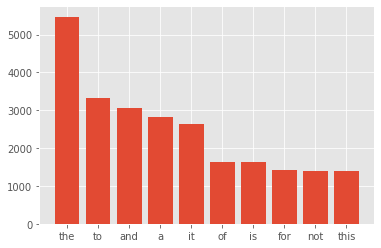

In [162]:
x,y=zip(*top)  #iterating multiple objects in (top)
plt.bar(x,y) #plotting a barplot

<BarContainer object of 10 artists>

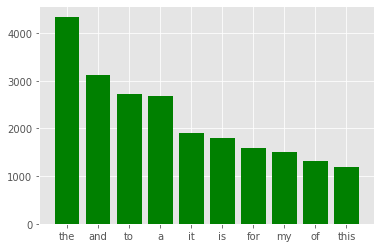

In [163]:
corpus=create_corpus(1)#setting value of corpus as the second value of create_corpus

dic=defaultdict(int)
for word in corpus:#looping through every words in corpus for negative
    if word in stop:#from stopwords
        dic[word]+=1#adding the value

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] #using lamda function to sort the dictionary items ie., taking x in and returning x[1]

x,y=zip(*top) #iterating multiple objects in (top)
plt.bar(x,y, color = 'green') #plotting a barplot

<BarContainer object of 19 artists>

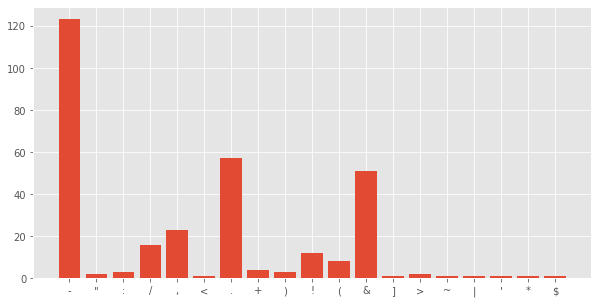

In [164]:
plt.figure(figsize=(10,5)) #setting the figure size
corpus=create_corpus(1) #setting value of corpus as the second value of create_corpus for positive

dic=defaultdict(int)
import string #importing string
special = string.punctuation #setting value of special as punctuation marks
for i in (corpus): #looping through every words in corpus
    if i in special: #finding punctuations
        dic[i]+=1 #adding the value
        
x,y=zip(*dic.items()) #iterating multiple objects in (top)
plt.bar(x,y) #plotting a barplot

<BarContainer object of 19 artists>

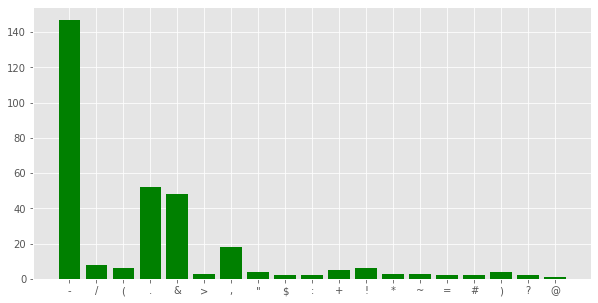

In [165]:
plt.figure(figsize=(10,5))  #setting the figure size
corpus=create_corpus(0) #setting value of corpus as the second value of create_corpus for negative

dic=defaultdict(int)
import string #importing string
special = string.punctuation #setting value of special as punctuation marks
for i in (corpus): #looping through every words in corpus
    if i in special: #finding punctuations
        dic[i]+=1 #adding the value
        
x,y=zip(*dic.items()) #iterating multiple objects in (top)
plt.bar(x,y,color='green') #plotting a barplot

In [166]:
#finding the most common words in positive
counter=Counter(corpus)
most=counter.most_common() #count element in list with collection
x=[]
y=[]
for word,count in most[:40]: 
    if (word not in stop) :
        x.append(word) #appending in x list
        y.append(count) #appending in y list

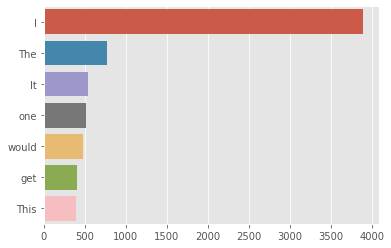

In [167]:
sns.barplot(x=y,y=x) #create a barplot of most common used words in dataset

In [168]:
def get_top_tweet_bigrams(corpus, n=None): #setting up a function
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus) #convert collection of text to token counts
    bag_of_words = vec.transform(corpus) #representing how a specific text represents a word in corpus
    sum_words = bag_of_words.sum(axis=0) #sum of each word occurence of all text in corpus
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #sortinga list of tuples containig word and their occurance in corpus.
    return words_freq[:n]

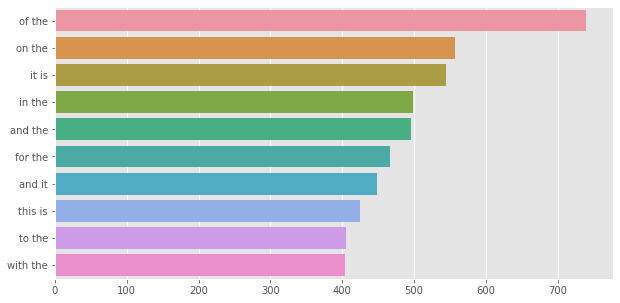

In [169]:
plt.figure(figsize=(10,5))  #setting the figure size
top_tweet_bigrams=get_top_tweet_bigrams(train['review'])[:10] 
x,y=map(list,zip(*top_tweet_bigrams)) #applying map to the zip of get_top_tweet_bigrams
sns.barplot(x=y,y=x) #plotting a barplot

In [170]:
#removing punctuations
def remove_punct(review):
    table=str.maketrans('','',string.punctuation) #removing punctuation from the string 
    return review.translate(table)

example="I am a #king" #example
print(remove_punct(example))

I am a king


In [171]:
df= train #setting train as df (name)

In [172]:
df['review']=df['review'].apply(lambda x : remove_punct(x)) #applying lamda function to remove punctuation from 'review'

In [173]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"#example URl

In [174]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')#removing URL from the string
    return url.sub(r'',text)

remove_URL(example) #example

'New competition launched :'

In [175]:
df['review']=df['review'].apply(lambda x : remove_URL(x))#applying lamda function to remove URL from 'review'


In [176]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [177]:
def remove_html(review):
    html=re.compile(r'<.*?>')#removing HTML tags from the string
    return html.sub(r'',review)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [178]:
df['review']=df['review'].apply(lambda x : remove_html(x)) #applying lamda function to remove HTML tags from 'review'

In [179]:
# !pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
# from spellchecker import SpellChecker

# spell = SpellChecker()
# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)
        
# text = "corect me plese"
# correct_spellings(text)

'correct me plese'

In [181]:
#df['review']=df['review'].apply(lambda x : correct_spellings(x)

In [182]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['review']): #adding a progress bar
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))] #removing word with non-alphabetic character & making everything lower case
        corpus.append(words) #appending to corpus
    return corpus

In [183]:
corpus=create_corpus(df) #building corpus from web

100%|██████████| 4000/4000 [00:01<00:00, 3664.45it/s]


In [184]:
embedding_dict={}
with open('glove.6B.100d.txt','r') as f: #Download from https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt
    for line in f:
        values=line.split() #splitting the lines
        word=values[0] #setting word as first value
        vectors=np.asarray(values[1:],'float32') #converting values to array
        embedding_dict[word]=vectors #giving unique vector to each words 
f.close()

In [201]:
#tokenizing the words
MAX_LEN=50
tokenizer_obj=Tokenizer() #tokenizing
tokenizer_obj.fit_on_texts(corpus)#updates internal vovabulary
sequences=tokenizer_obj.texts_to_sequences(corpus) #lsit of sequence

train_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post') #applying padding and truncating respectively

In [186]:
word_index=tokenizer_obj.word_index #finding number of unique words
print('Number of unique words:',len(word_index)) #printing number of unique words

Number of unique words: 10780


In [187]:
#setting embeding for the words. 
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100)) 

for word,i in tqdm(word_index.items()): #setting a progress bar
    if i > num_words: #when i > num_words 
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
            

100%|██████████| 10780/10780 [00:00<00:00, 178796.51it/s]


In [188]:
model=Sequential() #model is sequential

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False) #setting up embedding layer

model.add(embedding) #applying embedding layer
model.add(Dropout(0.2)) #applying dropout layer
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2)) #applying LSTM layer
model.add(Dense(1, activation='sigmoid')) #applying LSTM layer


optimzer=Adam(learning_rate=0.001) #applying Adam optimizer

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy']) #loss function = binary_crossentropy as it is binary

In [189]:
model.summary() #summary of the results

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1078100   
                                                                 
 dropout_3 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,120,405
Trainable params: 42,305
Non-trainable params: 1,078,100
_________________________________________________________________


In [190]:
#setting the dataset to training and testing dataset
training=train_pad[:train.shape[0]]
test=train_pad[train.shape[0]:]


In [191]:
# for i in X_train:
#   print(i)

In [192]:
X_train,X_test,y_train,y_test = train_test_split(training,train['rating'].values,test_size=0.15) #spillting the dataset 
print('Shape of train',X_train.shape) #printing shape of train
print("Shape of Validation ",X_test.shape) #printing shape of test

Shape of train (3400, 50)
Shape of Validation  (600, 50)


In [193]:
history=model.fit(X_train,y_train,batch_size= 50,epochs=30,validation_data=(X_test,y_test),verbose=1) #leaning start

Epoch 1/30
68/68 [==============================] - 13s 137ms/step - loss: 0.6693 - accuracy: 0.5915 - val_loss: 0.5827 - val_accuracy: 0.6933
Epoch 2/30
68/68 [==============================] - 9s 137ms/step - loss: 0.5572 - accuracy: 0.7238 - val_loss: 0.4940 - val_accuracy: 0.7733
Epoch 3/30
68/68 [==============================] - 9s 133ms/step - loss: 0.5136 - accuracy: 0.7529 - val_loss: 0.4787 - val_accuracy: 0.7833
Epoch 4/30
68/68 [==============================] - 7s 103ms/step - loss: 0.4910 - accuracy: 0.7721 - val_loss: 0.4705 - val_accuracy: 0.7900
Epoch 5/30
68/68 [==============================] - 3s 47ms/step - loss: 0.4660 - accuracy: 0.7844 - val_loss: 0.4670 - val_accuracy: 0.7950
Epoch 6/30
68/68 [==============================] - 6s 88ms/step - loss: 0.4829 - accuracy: 0.7809 - val_loss: 0.4289 - val_accuracy: 0.8033
Epoch 7/30
68/68 [==============================] - 5s 80ms/step - loss: 0.4517 - accuracy: 0.7938 - val_loss: 0.4320 - val_accuracy: 0.7967
Epoch 8/

In [194]:
# model.save('final_data.h5')

In [195]:
import matplotlib.pyplot as plt


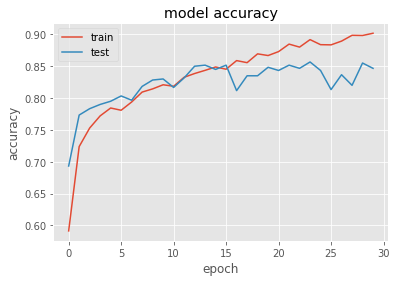

In [196]:
#creating plot of model accuracy vs val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

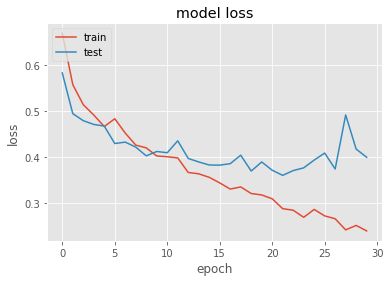

In [197]:
#creating plot of loss in test vs loss in train
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [198]:
#appenfing the X_test value in res_lstm
res_lstm = []
for i in X_test:
    abc = model.predict(i.reshape(1, 50)) #reshaping the model value in between 0 and 1
    if abc <= 0.5:
      res_lstm.append(0)
    else:
      res_lstm.append(1)

1/1 [==============================] - 0s 39ms/step


In [199]:
print(y_test) 
print(res_lstm)

[0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.

In [200]:
accuracy_lstm = accuracy_score(y_test, res_lstm)#accuracy
f1_score_lstm = f1_score(y_test, res_lstm) #f1_score
pres_lstm = precision_score(y_test, res_lstm) #precision
recall_lstm = recall_score(y_test, res_lstm) #recall

print("Accuracy of the LSTM: ", accuracy_lstm)
print("F1 score of the LSTM: ", f1_score_lstm)
print("Precision of the LSTM", pres_lstm)
print("Recall of the LSTM", recall_lstm)

Accuracy of the LSTM:  0.8466666666666667
F1 score of the LSTM:  0.8466666666666667
Precision of the LSTM 0.8523489932885906
Recall of the LSTM 0.8410596026490066
